In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-whitegrid')

We import the needed packages and we read the data into a pandas dataframe

In [5]:
df=pd.read_csv("D:\\Datasets\\Markets_Customers\\Mall_Customers.csv") #Change the FILE PATH

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We explore the data and see that it is fairly simple with just 5 columns where we dont use CustomerID and no null values

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

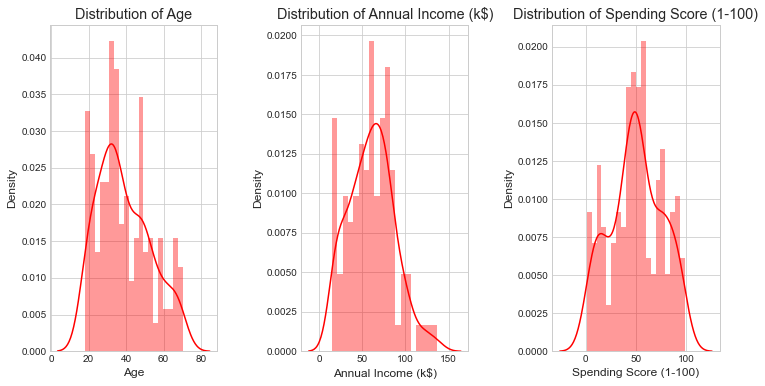

In [45]:
f,ax = plt.subplots(figsize=(12,6))
n=1
for col in ["Age","Annual Income (k$)","Spending Score (1-100)"]:
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace =.5 , wspace =.5)
    plt.title(f"Distribution of {col}")
    sns.distplot(df[col],kde=True,color='red',bins=20)
    n+=1

On plotting we see that they are fairly normally distributed with some skewness. We can also see that most of the customers belong to the 20-40 age group with a spending score near the 50s

Female    112
Male       88
Name: Gender, dtype: int64

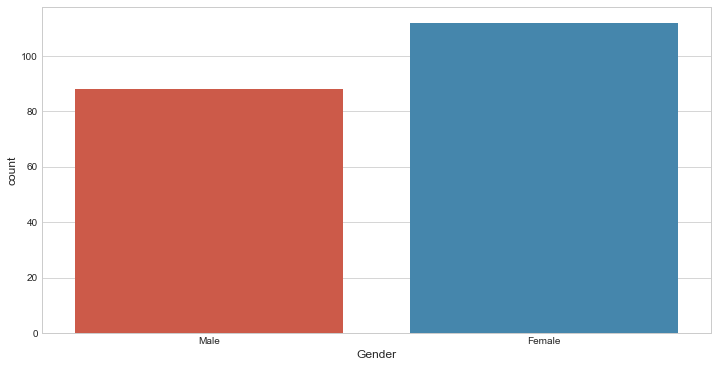

In [46]:
f,ax=plt.subplots(figsize=(12,6))
sns.countplot(df["Gender"])
df["Gender"].value_counts()

We can see that the number of males and females are also on the same scale with a bit more females

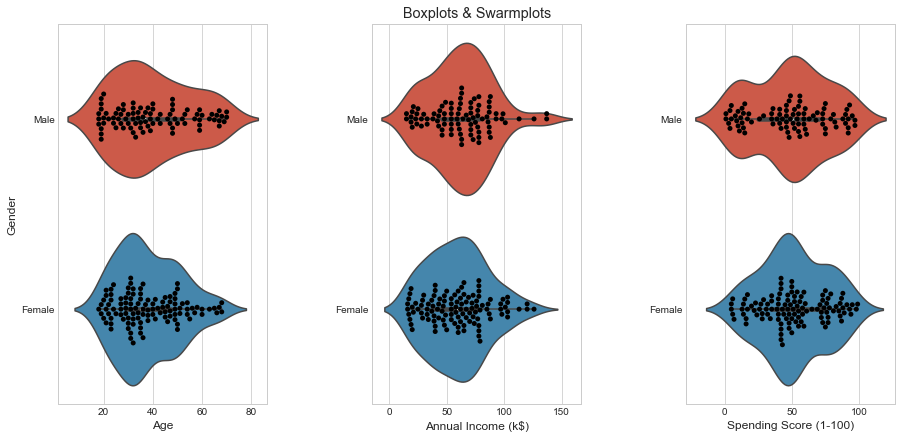

In [83]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df )
    sns.swarmplot(x = cols , y = 'Gender' , data = df,color="black")
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')

We now plot scatterplots on each feature and try to learn something from itsdistribution with respect to the other features

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

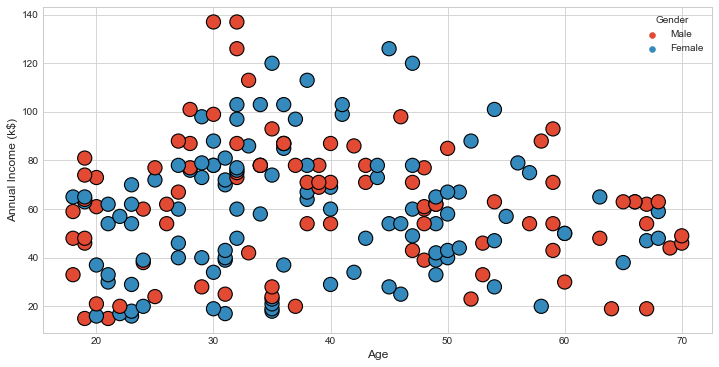

In [76]:
f,ax=plt.subplots(figsize=(12,6))
sns.scatterplot(data=df,x="Age",y="Annual Income (k$)",hue="Gender",s=200,edgecolour="black")

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

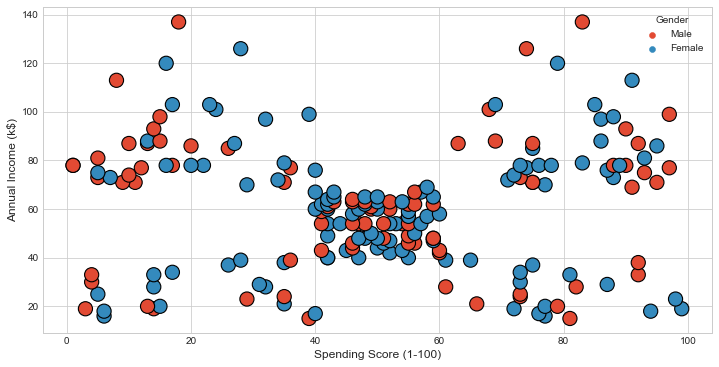

In [59]:
f,ax=plt.subplots(figsize=(12,6))
sns.scatterplot(data=df,x="Spending Score (1-100)",y="Annual Income (k$)",hue="Gender",s=200,edgecolor="black")

Here we can see that people with annual incomes in range of 40k to 80k have a very defined spending score. This maybe a cluster of people with similar financial situations that we can target

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

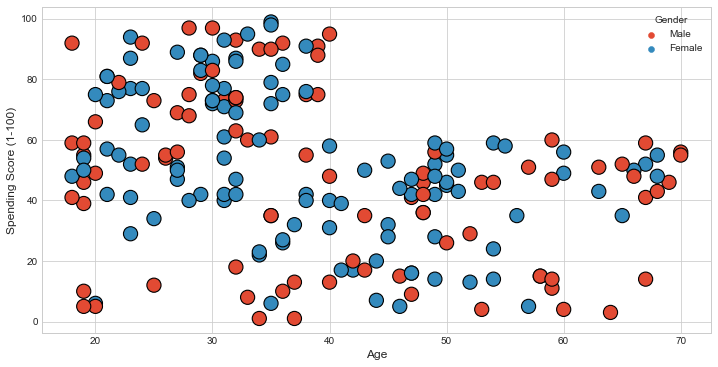

In [58]:
f,ax=plt.subplots(figsize=(12,6))
sns.scatterplot(data=df,x="Age",y="Spending Score (1-100)",hue="Gender",s=200,edgecolor="black")

Running K Means with 2 features at a time for easy visualization without any dimension reduction techniques.

That is we will see the dependancies in a vaccum in pairs

In [108]:
def get_inertia_plot(data):
    """Helper function to fit models and plot Elbow Curve"""
    
    inertias=[]
    for n in range(1,15):
        model=KMeans(n_clusters=n,n_jobs=-1,random_state=69)
        model.fit(data)
        inertias.append(model.inertia_)
    f,ax=plt.subplots(figsize=(12,6))
    plt.plot(np.arange(1,15),inertias,"o")
    plt.plot(np.arange(1,15),inertias,"-",alpha=.3)
    plt.title("Elbow plot")
    plt.xlabel("No. Of Clusters")
    plt.ylabel("Inertia")
        

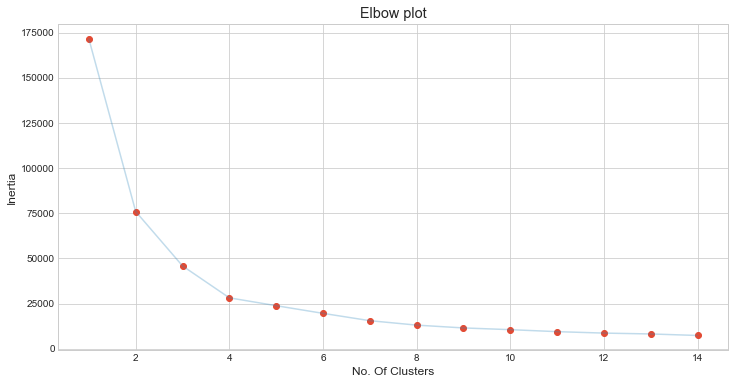

In [112]:
x1=df[['Age' , 'Spending Score (1-100)']]
get_inertia_plot(x1)

4 seems like a good spot so lets pick the number of clusters as 4

In [147]:
def get_clusters(data):
    """Helper to Kmeans with the optimal number of clusters and output separation"""
    
    model=KMeans(n_clusters=4,n_jobs=-1,random_state=69)
    model.fit(data)
    labels=model.predict(data)
    centers=model.cluster_centers_
    f,ax=plt.subplots(figsize=(12,6))
    plt.scatter(data.iloc[:,0],data.iloc[:,1],c=labels,cmap='viridis',s=200)
    plt.scatter(centers[:,0],centers[:,1],c="black",s=300,alpha=.4)
    plt.title("K Means")
    plt.xlabel(f"{data.columns[0]}")
    plt.ylabel(f"{data.columns[1]}")
    

**K Means Between Age and Spending Score:**

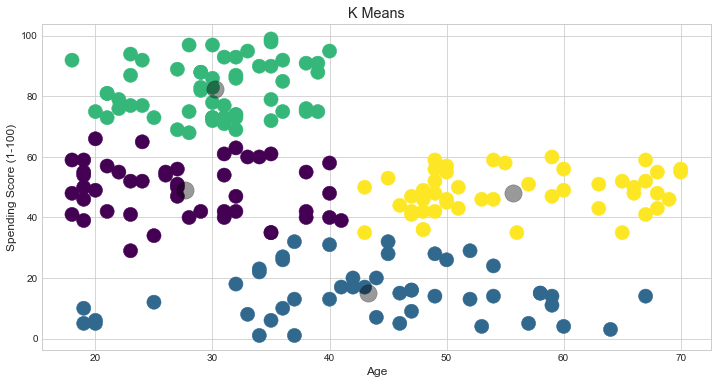

In [148]:
get_clusters(x1)

From this we can observe that:
* Our highest purchasers are the ones that belong to the age group of 20-40. They bring in the most revenue combined to the establishment and anything done to target them will be effective.
* We also have the age group of 40 and older who we can consider moderate to low spenders

**K Means Between Annual Income and Spending Score:**

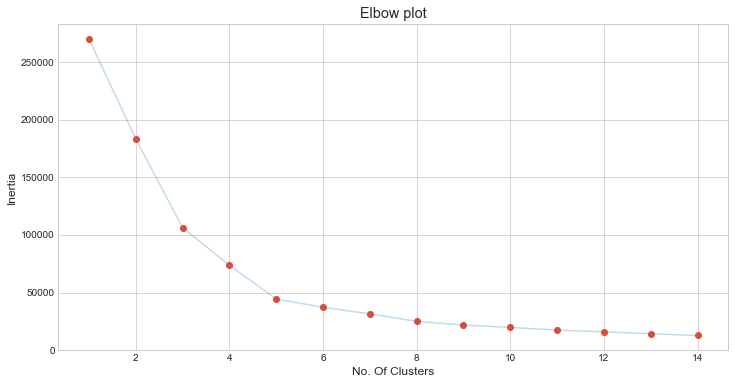

In [150]:
x2=df[['Annual Income (k$)' , 'Spending Score (1-100)']]
get_inertia_plot(x2)

Here we can pick 5 as our number of clusters

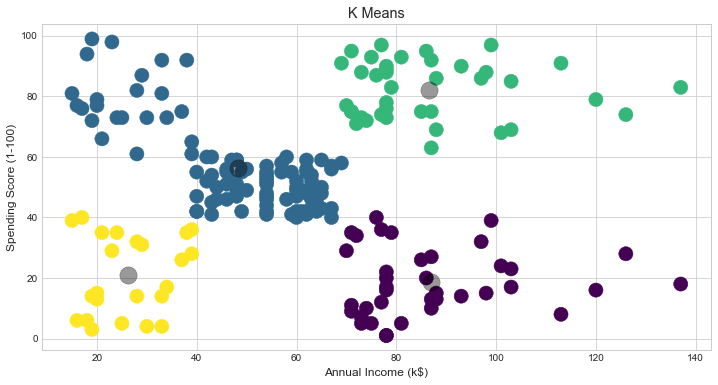

In [151]:
get_clusters(x2)

From here we can see:
* Consumers with high income forms 2 well defined clusters
* Consumers with income <= 50K bring in the bulk of revenue. Tho thier spending score is low the number of people is high and thus causing a net increase in profit 